

---
**INITIAL STEPS**

---




**Importing Modules**

In [ ]:
#IMPORT THE LIBRARIES....
import numpy as np # mathematics....
import pandas as pd # data analysis....
from matplotlib import pyplot as plt #visualization of the data....
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
import plotly.graph_objs as go

#Libraries to visualize the dataset....
import matplotlib as mpl
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.express as px
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot

#Libraries for model creation....
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn import metrics

#Libraries for feature importance....
from sklearn.ensemble import ExtraTreesRegressor

**Mounting Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Locate Data (CSV)**

In [ ]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Thesis/main/test'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/Thesis/main/test/src.pkl
/content/drive/MyDrive/Thesis/main/test/src.ipynb
/content/drive/MyDrive/Thesis/main/test/app.ipynb
/content/drive/MyDrive/Thesis/main/test/src-pickle.pkl
/content/drive/MyDrive/Thesis/main/test/gapml-dataset.csv


**Load Data (CSV)**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Thesis/main/test/gapml-dataset.csv")

**Read Data (CSV)**

In [ ]:
df.head(5).style.background_gradient(cmap='Blues')

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.500000,4.500000,3.860000,1,0.920000
1,2,324,107,4,4.000000,4.500000,3.550000,1,0.760000
2,3,316,104,3,3.000000,3.500000,3.200000,1,0.720000
3,4,322,110,3,3.500000,2.500000,3.470000,1,0.800000
4,5,314,103,2,2.000000,3.000000,3.280000,0,0.650000


---


**Metadata of the Dataset**

---



**Shape of the Dataset**

In [ ]:
df.shape

(500, 9)

**Dimension of the Dataset**

In [ ]:
df.ndim

2

**Size of the Dataset**

In [ ]:
df.size

4500

**Column labels of the Dataset**

In [ ]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

**Index of the Dataset**

In [ ]:
df.index

RangeIndex(start=0, stop=500, step=1)

**Info of the Dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


---


**Delete unwanted column of the Dataset**

---



In [ ]:
del df['Serial No.']

**Descriptive statistics of the Dataset**

In [ ]:
# statistics on numerical data......
round(df.describe(exclude = ['object']).T, 2).style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
GRE Score,500.000000,316.470000,11.300000,290.000000,308.000000,317.000000,325.000000,340.000000
TOEFL Score,500.000000,107.190000,6.080000,92.000000,103.000000,107.000000,112.000000,120.000000
University Rating,500.000000,3.110000,1.140000,1.000000,2.000000,3.000000,4.000000,5.000000
SOP,500.000000,3.370000,0.990000,1.000000,2.500000,3.500000,4.000000,5.000000
LOR,500.000000,3.480000,0.930000,1.000000,3.000000,3.500000,4.000000,5.000000
CGPA,500.000000,3.430000,0.240000,2.720000,3.250000,3.420000,3.620000,3.970000
Research,500.000000,0.560000,0.500000,0.000000,0.000000,1.000000,1.000000,1.000000
Chance of Admit,500.000000,0.720000,0.140000,0.340000,0.630000,0.720000,0.820000,0.970000


---


**(Divide the Numerical Features)**

---



**Discrete Variables**

In [ ]:
Discrete_features = [feature for feature in df.columns if df[feature].dtypes=='int64']
print("Discrete features features are :",Discrete_features)

Discrete features features are : ['GRE Score', 'TOEFL Score', 'University Rating', 'Research']


**Continuous Variables**

In [ ]:
Continous_features = [feature for feature in df.columns if df[feature].dtypes=='float64']
print("Continous features features are :",Continous_features)

Continous features features are : ['SOP', 'LOR ', 'CGPA', 'Chance of Admit ']


---

**Removing unwanted spaces in the Column Names**

---






In [ ]:
#LOR and Chance of Admit column names had unwanted spaces
df.columns = df.columns.str.replace(' ', '')
df.columns

Index(['GREScore', 'TOEFLScore', 'UniversityRating', 'SOP', 'LOR', 'CGPA',
       'Research', 'ChanceofAdmit'],
      dtype='object')



---


**Finding the Number of Unique Values for each Columns**


---



In [ ]:
from IPython.core.display import HTML

def multi_table(table_list):
    ''' Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
    '''
    return HTML(
        '<table><tr style="background-color:white;">' + 
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>')

In [ ]:
df_nunique = {var: pd.DataFrame(df[var].value_counts()) 
              for var in {'GREScore', 'TOEFLScore', 'UniversityRating', 'SOP', 'LOR','CGPA',
       'Research', 'ChanceofAdmit'}}
multi_table([df_nunique['GREScore'].style.background_gradient(cmap='Blues'), df_nunique['TOEFLScore'].style.background_gradient(cmap='Blues'),df_nunique['UniversityRating'].style.background_gradient(cmap='Blues') ,df_nunique['SOP'].style.background_gradient(cmap='Blues'),df_nunique['LOR'].style.background_gradient(cmap='Blues'),df_nunique['CGPA'].style.background_gradient(cmap='Blues'),df_nunique['Research'].style.background_gradient(cmap='Blues'),df_nunique['ChanceofAdmit'].style.background_gradient(cmap='Blues')])

,GREScore
312,24
324,23
316,18
321,17
322,17
327,17
311,16
320,16
314,16
317,15




---


**Finding the Missing Values**

---



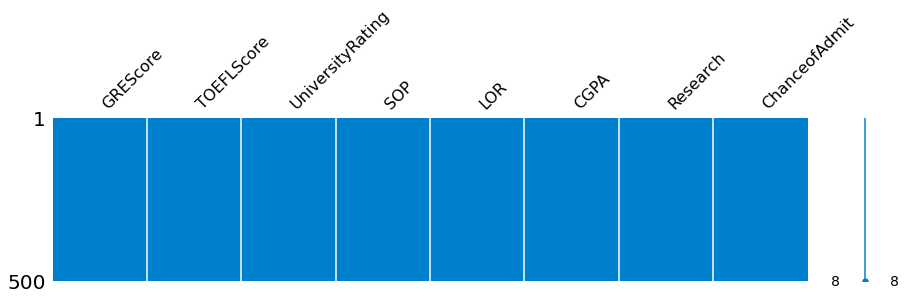

In [ ]:
#Visualizing the missing values
import missingno as mn
mn.matrix(df,figsize=(15,3),color=(0,0.5,0.8))

**Percentage of Blanks and Filled Values for all Columns**

In [ ]:
#PERCENTAGE OF THE MISSING VALUES - DATAFRAME..... 
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending = False)
    Percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, Percentage], axis=1, keys=['Total', 'Percentage'])
missing_data(df).style.background_gradient(cmap='Blues')

,Total,Percentage
GREScore,0,0.000000
TOEFLScore,0,0.000000
UniversityRating,0,0.000000
SOP,0,0.000000
LOR,0,0.000000
CGPA,0,0.000000
Research,0,0.000000
ChanceofAdmit,0,0.000000


---

**Finding Duplicate Records**


---



In [ ]:
df[df.duplicated()]

,GREScore,TOEFLScore,UniversityRating,SOP,LOR,CGPA,Research,ChanceofAdmit


The dataset has no duplicate records.



---

**## Univariate Analysis ##**

---



**Graduate Record Examination (GRE) Score**

In [ ]:
def percent_value_counts(df, feature):
    """This function takes in a dataframe and a column and finds the percentage of the value_counts"""
    percent = pd.DataFrame(round(df.loc[:,feature].value_counts(dropna=False, normalize=True)*100,2))
    ## creating a df with th
    total = pd.DataFrame(df.loc[:,feature].value_counts(dropna=False))
    ## concating percent and total dataframe

    total.columns = ["Total"]
    percent.columns = ['Percent']
    return pd.concat([total, percent], axis = 1)

In [ ]:
percent_value_counts(df, 'GREScore').style.background_gradient(cmap='Blues')

,Total,Percent
312,24,4.800000
324,23,4.600000
316,18,3.600000
321,17,3.400000
322,17,3.400000
327,17,3.400000
311,16,3.200000
320,16,3.200000
314,16,3.200000
317,15,3.000000


In [ ]:
fig = make_subplots(rows=1,cols=1)
fig.add_trace(go.Bar(y = df['GREScore'].value_counts().values.tolist(), 
                      x = df['GREScore'].value_counts().index, 
                      text=df['GREScore'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = '#2878b9',
                            line_color = '#2878b9',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title='Density distribution of GRE Score',
                  template='plotly_white')
fig.update_yaxes(range=[0,50])
iplot(fig)

Comment:

Highest number of students received the GRE Scores: "312" & "324" 

Most students received GRE Scores between "304" & "332"

**Test of English as a Foreign Language (TOEFL) Score**

In [ ]:
percent_value_counts(df, 'TOEFLScore').style.background_gradient(cmap='Blues')

,Total,Percent
110,44,8.800000
105,37,7.400000
104,29,5.800000
107,28,5.600000
106,28,5.600000
112,28,5.600000
103,25,5.000000
100,24,4.800000
102,24,4.800000
99,23,4.600000


In [ ]:
fig = make_subplots(rows=1,cols=1)
fig.add_trace(go.Bar(y = df['TOEFLScore'].value_counts().values.tolist(), 
                      x = df['TOEFLScore'].value_counts().index, 
                      text=df['TOEFLScore'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = '#2878b9',
                            line_color = '#2878b9',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title='Density distribution of TOEFL Score',
                  template='plotly_white')
fig.update_yaxes(range=[0,75])
iplot(fig)

Comment:

Highest number of students received the TOEFL Scores: "105" & "110" 

Most students received TOEFL Scores between "98" & "116"

**CGPA**

In [ ]:
percent_value_counts(df, 'CGPA').style.background_gradient(cmap='Blues')

,Total,Percent
3.46,18,3.600000
3.5,15,3.000000
3.42,15,3.000000
3.38,14,2.800000
3.06,13,2.600000
3.2,12,2.400000
3.25,12,2.400000
3.66,11,2.200000
3.64,11,2.200000
3.34,10,2.000000


In [ ]:
fig = make_subplots(rows=1,cols=1)
fig.add_trace(go.Bar(y = df['CGPA'].value_counts().values.tolist(), 
                      x = df['CGPA'].value_counts().index, 
                      text=df['CGPA'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = '#2878b9',
                            line_color = '#2878b9',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title='Density distribution of CGPA',
                  template='plotly_white')
fig.update_yaxes(range=[0,20])
iplot(fig)

Comment:

Highest number of students received the CGPA: "3.46", "3.5" & "3.42" 

Most students received CGPA between "3.06" & "3.82"

**Statement of Purpose (SOP)**

In [ ]:
percent_value_counts(df, 'SOP').style.background_gradient(cmap='Blues')

,Total,Percent
4.0,89,17.800000
3.5,88,17.600000
3.0,80,16.000000
2.5,64,12.800000
4.5,63,12.600000
2.0,43,8.600000
5.0,42,8.400000
1.5,25,5.000000
1.0,6,1.200000


In [ ]:
fig = make_subplots(rows=1,cols=1)
fig.add_trace(go.Bar(y = df['SOP'].value_counts().values.tolist(), 
                      x = df['SOP'].value_counts().index, 
                      text=df['SOP'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = '#2878b9',
                            line_color = '#2878b9',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title='Density distribution of SOP',
                  template='plotly_white')
fig.update_yaxes(range=[0,150])
iplot(fig)

Comment:

Most number of SOP is  between "2.5" & "4.5"

**Letter of Recommendation (LOR)**

In [ ]:
percent_value_counts(df, 'LOR').style.background_gradient(cmap='Blues')

,Total,Percent
3.0,99,19.800000
4.0,94,18.800000
3.5,86,17.200000
4.5,63,12.600000
2.5,50,10.000000
5.0,50,10.000000
2.0,46,9.200000
1.5,11,2.200000
1.0,1,0.200000


In [ ]:
fig = make_subplots(rows=1,cols=1)
fig.add_trace(go.Bar(y = df['LOR'].value_counts().values.tolist(), 
                      x = df['LOR'].value_counts().index, 
                      text=df['LOR'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = '#2878b9',
                            line_color = '#2878b9',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title='Density distribution of LOR',
                  template='plotly_white')
fig.update_yaxes(range=[0,150])
iplot(fig)

Comment:

Most number of LOR is between "2.5" & "5"

**University Rating**

In [ ]:
percent_value_counts(df, 'UniversityRating').style.background_gradient(cmap='Blues')

,Total,Percent
3,162,32.400000
2,126,25.200000
4,105,21.000000
5,73,14.600000
1,34,6.800000


In [ ]:
fig = make_subplots(rows=1,cols=1)
fig.add_trace(go.Bar(y = df['UniversityRating'].value_counts().values.tolist(), 
                      x = df['UniversityRating'].value_counts().index, 
                      text=df['UniversityRating'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = '#2878b9',
                            line_color = '#2878b9',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title='Density distribution of University Rating',
                  template='plotly_white')
fig.update_yaxes(range=[0,250])
iplot(fig)

Comment: 

Highest number of the University Rating is "2" & "3"

**Research**

In [ ]:
percent_value_counts(df, 'Research').style.background_gradient(cmap='Blues')

,Total,Percent
1,280,56.000000
0,220,44.000000


In [ ]:
fig = make_subplots(rows=1,cols=1)
fig.add_trace(go.Bar(y = df['Research'].value_counts().values.tolist(), 
                      x = df['Research'].value_counts().index, 
                      text=df['Research'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = '#2878b9',
                            line_color = '#2878b9',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title='Density distribution of Research',
                  template='plotly_white')
fig.update_yaxes(range=[0,350])
iplot(fig)

Comment:

"280" Students completed their Researches, while "220" Students didn't.

**Chance of Admit**

In [ ]:
percent_value_counts(df, 'ChanceofAdmit').style.background_gradient(cmap='Blues')

,Total,Percent
0.71,23,4.600000
0.64,19,3.800000
0.73,18,3.600000
0.72,16,3.200000
0.79,16,3.200000
0.78,15,3.000000
0.76,14,2.800000
0.62,13,2.600000
0.94,13,2.600000
0.7,13,2.600000


In [ ]:
fig = make_subplots(rows=1,cols=1)
fig.add_trace(go.Bar(y = df['ChanceofAdmit'].value_counts().values.tolist(), 
                      x = df['ChanceofAdmit'].value_counts().index, 
                      text=df['ChanceofAdmit'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = '#2878b9',
                            line_color = '#2878b9',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title='Density distribution of Chance of Admit',
                  template='plotly_white')
fig.update_yaxes(range=[0,30])
iplot(fig)

Comment:

Highest chance of getting admission is between "0.61" & "0.97"

---
**Bivariate Analysis**

---





**GREScore vs ChanceofAdmit**

In [ ]:
fig = px.box(df, x="GREScore", y="ChanceofAdmit")
fig.update_layout(title='GREScore Vs ChanceofAdmit',
                  template='plotly_white')
fig.update_traces(marker_size=12,marker_color='#2878b9')
fig.show()

fig = px.scatter(df, x="GREScore", y="ChanceofAdmit",trendline="ols",trendline_color_override = '#000000',width=1000, height=400)
fig.update_traces(marker_size=12,marker_color='#2878b9')
fig.update_layout(title='GREScore Vs ChanceofAdmit',
                  template='plotly_white')
fig.show()

Comment:

Strong positive relationship between GREScore and ChanceofAdmit.

**TOEFLScore vs ChanceofAdmit**

In [ ]:
fig = px.box(df, x="TOEFLScore", y="ChanceofAdmit")
fig.update_layout(title='TOEFLScore Vs ChanceofAdmit',
                  template='plotly_white')
fig.update_traces(marker_size=12,marker_color='#2878b9')
fig.show()

fig = px.scatter(df, x="TOEFLScore", y="ChanceofAdmit", trendline="ols",trendline_color_override = '#000000',width=1000, height=400)
fig.update_layout(title='TOEFLScore Vs ChanceofAdmit',
                  template='plotly_white')
fig.update_traces(marker_size=12,marker_color='#2878b9')
fig.show()

Comment:

Strong positive relationship present between TOEFLScore and ChanceofAdmit.

**CGPA vs ChanceofAdmit**

In [ ]:
fig = px.box(df, x="CGPA", y="ChanceofAdmit")
fig.update_layout(title='CGPA Vs ChanceofAdmit',
                  template='plotly_white')
fig.update_traces(marker_size=12,marker_color='#2878b9')
fig.show()
fig = px.scatter(df, x="CGPA", y="ChanceofAdmit", trendline="ols",trendline_color_override = '#000000',width=1000, height=400)
fig.update_traces(marker_size=12,marker_color='#2878b9')
fig.update_layout(title='CGPA Vs ChanceofAdmit',
                  template='plotly_white')
fig.show()

Comment:

CGPA and ChanceofAdmit has strong positive relation.

**SOP vs ChanceofAdmit**

In [ ]:
fig = px.box(df, x="SOP", y="ChanceofAdmit")
fig.update_layout(title='SOP Vs ChanceofAdmit',
                  template='plotly_white')
fig.update_traces(marker_size=12,marker_color='#2878b9')
fig.show()
fig = px.scatter(df, x="SOP", y="ChanceofAdmit", trendline="ols",trendline_color_override = '#000000',width=1000, height=400)
fig.update_layout(title='SOP Vs ChanceofAdmit',
                  template='plotly_white')
fig.update_traces(marker_size=12,marker_color='#2878b9')
fig.show()

Comment:

No relationship between SOP and Chance of Admit.

**LOR vs ChanceofAdmit**

In [ ]:
fig = px.box(df, x="LOR", y="ChanceofAdmit")
fig.update_layout(title='LOR Vs ChanceofAdmit',
                  template='plotly_white')
fig.update_traces(marker_size=12,marker_color='#2878b9')
fig.show()
fig = px.scatter(df, x="LOR", y="ChanceofAdmit", trendline="ols",trendline_color_override = '#000000',width=1000, height=400)
fig.update_traces(marker_size=12,marker_color='#2878b9')
fig.update_layout(title='LOR Vs ChanceofAdmit',
                  template='plotly_white')
fig.show()

Comment:

No relationship between LOR and ChanceofAdmit.

**UniversityRating vs ChanceofAdmit**

In [ ]:
fig = px.box(df, x="UniversityRating", y="ChanceofAdmit")
fig.update_layout(title='UniversityRating Vs ChanceofAdmit',
                  template='plotly_white')
fig.update_traces(marker_size=12,marker_color='#2878b9')
fig.show()

fig = px.scatter(df, x="UniversityRating", y="ChanceofAdmit", trendline="ols",trendline_color_override = '#000000',width=1000, height=400)
fig.update_traces(marker_size=12,marker_color='#2878b9')
fig.update_layout(title='UniversityRating Vs ChanceofAdmit',
                  template='plotly_white')
fig.show()

Comment:

No relationship between UniversityRating and ChanceofAdmit.

**Research vs ChanceofAdmit**

In [ ]:
fig = px.box(df, x="Research", y="ChanceofAdmit")
fig.update_layout(title='Research Vs ChanceofAdmit',
                  template='plotly_white')
fig.update_traces(marker_size=12,marker_color='#2878b9')
fig.show()
fig = px.scatter(df, x="Research", y="ChanceofAdmit", trendline="ols",trendline_color_override = '#000000',width=1000, height=400)
fig.update_traces(marker_size=12,marker_color='#2878b9')
fig.update_layout(title='Research Vs ChanceofAdmit',
                  template='plotly_white')
fig.show()

Comment:

No relationship between Research and ChanceofAdmit.

**Summary of Bivariate Analysis**

---
ChanceofAdmit has strong relationship with GRE, TOEFL and CGPA.




---


**Detecting Multicollinearity**

---



**GREScore vs Other Features**

In [ ]:
# Let's set the visualization parameters
fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'xy'}]])

###TOEFLScore Vs GREScore###

# Setting Scatter parameters
fig = px.scatter(df, x="TOEFLScore", y="GREScore", trendline="ols",trendline_color_override = '#000000',width=800, height=300)
fig.update_traces(marker_size=12,marker_color='#2878b9')
fig.update_layout(title='TOEFL Vs GREScore',
                  template='plotly_white')
# Displaying the Scatter
fig.show()
              
###UniversityRating Vs GREScore###
              
# Setting Scatter parameters
fig = px.scatter(df, x="UniversityRating",y="GREScore", trendline="ols",trendline_color_override = '#000000',width=800, height=300)
fig.update_traces(marker_size=12,marker_color='#2878b9')
fig.update_layout(title='UniversityRating Vs GREScore',
                  template='plotly_white')
# Displaying the Scatter
fig.show()

###SOP Vs GREScore###
              
# Setting Scatter parameters
fig = px.scatter(df, x="SOP", y="GREScore", trendline="ols",trendline_color_override = '#000000',width=800, height=300)
fig.update_traces(marker_size=12,marker_color='#2878b9')
fig.update_layout(title='SOP Vs GREScore',
                  template='plotly_white')
# Displaying the Scatter
fig.show()

###LOR Vs GREScore###             
             
# Setting Scatter parameters
fig = px.scatter(df, x="LOR", y="GREScore", trendline="ols",trendline_color_override = '#000000',width=800, height=300)
fig.update_traces(marker_size=12,marker_color='#2878b9')
fig.update_layout(title='LOR Vs GREScore',
                  template='plotly_white')
# Displaying the Scatter
fig.show()

###CGPA Vs GREScore###
              
# Setting Scatter parameters
fig = px.scatter(df, x="CGPA",y="GREScore", trendline="ols",trendline_color_override = '#000000',width=800, height=300)
fig.update_traces(marker_size=12,marker_color='#2878b9')
fig.update_layout(title='CGPA Vs GREScore',
                  template='plotly_white')
# Displaying the Scatter
fig.show()
           
###Research Vs GREScore###
              
# Setting Scatter parameters
fig = px.scatter(df, x="Research", y="GREScore", trendline="ols",trendline_color_override = '#000000',width=800, height=300)
fig.update_traces(marker_size=12,marker_color='#2878b9')
fig.update_layout(title='Research Vs GREScore',
                  template='plotly_white')
# Displaying the Scatter
fig.show()

Comment:

"CGPA" and "TOEFLScore" are positively corelated with "GREScore"

**TOEFLScore vs Other Features**

In [ ]:
# Let's set the visualization parameters
fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'xy'}]])

###GREScore Vs TOEFLScore###

# Setting Scatter parameters
fig = px.scatter(df, x="GREScore", y="TOEFLScore", trendline="ols",trendline_color_override = '#000000',width=800, height=300)
fig.update_traces(marker_size=12,marker_color='#2878b9')
fig.update_layout(title='GREScore Vs TOEFLScore',
                  template='plotly_white')
# Displaying the Scatter
fig.show()
              
###UniversityRating Vs TOEFLScore###
              
# Setting Scatter parameters
fig = px.scatter(df, x="UniversityRating",y="TOEFLScore", trendline="ols",trendline_color_override = '#000000',width=800, height=300)
fig.update_traces(marker_size=12,marker_color='#2878b9')
fig.update_layout(title='UniversityRating Vs TOEFLScore',
                  template='plotly_white')
# Displaying the Scatter
fig.show()

###SOP Vs TOEFLScore###
              
# Setting Scatter parameters
fig = px.scatter(df, x="SOP", y="TOEFLScore", trendline="ols",trendline_color_override = '#000000',width=800, height=300)
fig.update_traces(marker_size=12,marker_color='#2878b9')
fig.update_layout(title='SOP Vs TOEFLScore',
                  template='plotly_white')
# Displaying the Scatter
fig.show()

###LOR Vs TOEFLScore###             
             
# Setting Scatter parameters
fig = px.scatter(df, x="LOR", y="TOEFLScore", trendline="ols",trendline_color_override = '#000000',width=800, height=300)
fig.update_traces(marker_size=12,marker_color='#2878b9')
fig.update_layout(title='LOR Vs TOEFLScore',
                  template='plotly_white')
# Displaying the Scatter
fig.show()

###CGPA Vs TOEFLScore###
              
# Setting Scatter parameters
fig = px.scatter(df, x="CGPA",y="TOEFLScore", trendline="ols",trendline_color_override = '#000000',width=800, height=300)
fig.update_traces(marker_size=12,marker_color='#2878b9')
fig.update_layout(title='CGPA Vs TOEFLScore',
                  template='plotly_white')
# Displaying the Scatter
fig.show()
           
###Research Vs TOEFLScore###
              
# Setting Scatter parameters
fig = px.scatter(df, x="Research", y="TOEFLScore", trendline="ols",trendline_color_override = '#000000',width=800, height=300)
fig.update_traces(marker_size=12,marker_color='#2878b9')
fig.update_layout(title='Research Vs TOEFLScore',
                  template='plotly_white')
# Displaying the Scatter
fig.show()

Comment:

"CGPA" and "GREScore" are positively corelated with "TOEFLScore"

**CGPA vs Other Features**

In [ ]:
# Let's set the visualization parameters
fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'xy'}]])

###GREScore Vs CGPA###

# Setting Scatter parameters
fig = px.scatter(df, x="GREScore", y="CGPA", trendline="ols",trendline_color_override = '#000000',width=800, height=300)
fig.update_traces(marker_size=12,marker_color='#2878b9')
fig.update_layout(title='GREScore Vs CGPA',
                  template='plotly_white')
# Displaying the Scatter
fig.show()
              
###TOEFLScore Vs CGPA###
              
# Setting Scatter parameters
fig = px.scatter(df, x="TOEFLScore",y="CGPA", trendline="ols",trendline_color_override = '#000000',width=800, height=300)
fig.update_traces(marker_size=12,marker_color='#2878b9')
fig.update_layout(title='TOEFL Vs CGPA',
                  template='plotly_white')
# Displaying the Scatter
fig.show()

###UniversityRating Vs CGPA###
              
# Setting Scatter parameters
fig = px.scatter(df, x="UniversityRating", y="CGPA", trendline="ols",trendline_color_override = '#000000',width=800, height=300)
fig.update_traces(marker_size=12,marker_color='#2878b9')
fig.update_layout(title='UniversityRating Vs CGPA',
                  template='plotly_white')
# Displaying the Scatter
fig.show()

###LOR Vs CGPA###             
             
# Setting Scatter parameters
fig = px.scatter(df, x="LOR", y="CGPA", trendline="ols",trendline_color_override = '#000000',width=800, height=300)
fig.update_traces(marker_size=12,marker_color='#2878b9')
fig.update_layout(title='LOR Vs CGPA',
                  template='plotly_white')
# Displaying the Scatter
fig.show()

###SOP Vs CGPA###
              
# Setting Scatter parameters
fig = px.scatter(df, x="SOP",y="CGPA", trendline="ols",trendline_color_override = '#000000',width=800, height=300)
fig.update_traces(marker_size=12,marker_color='#2878b9')
fig.update_layout(title='SOP Vs CGPA',
                  template='plotly_white')
# Displaying the Scatter
fig.show()
           
###Research Vs CGPA###
              
# Setting Scatter parameters
fig = px.scatter(df, x="Research", y="CGPA", trendline="ols",trendline_color_override = '#000000',width=800, height=300)
fig.update_traces(marker_size=12,marker_color='#2878b9')
fig.update_layout(title='Research Vs CGPA',
                  template='plotly_white')
# Displaying the Scatter
fig.show()

Comment:

"GREScore" and "TOEFLScore" are positively corelated with "CGPA"

**SOP vs Other Features**

In [ ]:
# Let's set the visualization parameters
fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'xy'}]])

###GREScore Vs SOP###

# Setting Scatter parameters
fig = px.scatter(df, x="GREScore", y="SOP", trendline="ols",trendline_color_override = '#000000',width=800, height=300)
fig.update_traces(marker_size=12,marker_color='#2878b9')
fig.update_layout(title='GREScore Vs SOP',
                  template='plotly_white')
# Displaying the Scatter
fig.show()
              
###TOEFLScore Vs SOP###
              
# Setting Scatter parameters
fig = px.scatter(df, x="TOEFLScore",y="SOP", trendline="ols",trendline_color_override = '#000000',width=800, height=300)
fig.update_traces(marker_size=12,marker_color='#2878b9')
fig.update_layout(title='TOEFL Vs SOP',
                  template='plotly_white')
# Displaying the Scatter
fig.show()

###UniversityRating Vs SOP###
              
# Setting Scatter parameters
fig = px.scatter(df, x="UniversityRating", y="SOP", trendline="ols",trendline_color_override = '#000000',width=800, height=300)
fig.update_traces(marker_size=12,marker_color='#2878b9')
fig.update_layout(title='UniversityRating Vs SOP',
                  template='plotly_white')
# Displaying the Scatter
fig.show()

###LOR Vs SOP###             
             
# Setting Scatter parameters
fig = px.scatter(df, x="LOR", y="SOP", trendline="ols",trendline_color_override = '#000000',width=800, height=300)
fig.update_traces(marker_size=12,marker_color='#2878b9')
fig.update_layout(title='LOR Vs SOP',
                  template='plotly_white')
# Displaying the Scatter
fig.show()

###CGPA Vs SOP###
              
# Setting Scatter parameters
fig = px.scatter(df, x="CGPA",y="SOP", trendline="ols",trendline_color_override = '#000000',width=800, height=300)
fig.update_traces(marker_size=12,marker_color='#2878b9')
fig.update_layout(title='CGPA Vs SOP',
                  template='plotly_white')
# Displaying the Scatter
fig.show()
           
###Research Vs SOP###
              
# Setting Scatter parameters
fig = px.scatter(df, x="Research", y="SOP", trendline="ols",trendline_color_override = '#000000',width=800, height=300)
fig.update_traces(marker_size=12,marker_color='#2878b9')
fig.update_layout(title='Research Vs SOP',
                  template='plotly_white')
# Displaying the Scatter
fig.show()

Comment:

"CGPA", "GREScore" and "TOEFLScore" are positively corelated with "SOP"

This is maybe because high scoring students tend to keep a "SOP"


**LOR vs Other Features**

In [ ]:
# Let's set the visualization parameters
fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'xy'}]])

###GREScore Vs LOR###

# Setting Scatter parameters
fig = px.scatter(df, x="GREScore", y="LOR", trendline="ols",trendline_color_override = '#000000',width=800, height=300)
fig.update_traces(marker_size=12,marker_color='#2878b9')
fig.update_layout(title='GREScore Vs LOR',
                  template='plotly_white')
# Displaying the Scatter
fig.show()
              
###TOEFLScore Vs LOR###
              
# Setting Scatter parameters
fig = px.scatter(df, x="TOEFLScore",y="LOR", trendline="ols",trendline_color_override = '#000000',width=800, height=300)
fig.update_traces(marker_size=12,marker_color='#2878b9')
fig.update_layout(title='TOEFL Vs LOR',
                  template='plotly_white')
# Displaying the Scatter
fig.show()

###UniversityRating Vs LOR###
              
# Setting Scatter parameters
fig = px.scatter(df, x="UniversityRating", y="LOR", trendline="ols",trendline_color_override = '#000000',width=800, height=300)
fig.update_traces(marker_size=12,marker_color='#2878b9')
fig.update_layout(title='UniversityRating Vs LOR',
                  template='plotly_white')
# Displaying the Scatter
fig.show()

###LOR Vs SOP###             
             
# Setting Scatter parameters
fig = px.scatter(df, x="SOP", y="LOR", trendline="ols",trendline_color_override = '#000000',width=800, height=300)
fig.update_traces(marker_size=12,marker_color='#2878b9')
fig.update_layout(title='SOP Vs LOR',
                  template='plotly_white')
# Displaying the Scatter
fig.show()

###CGPA Vs LOR###
              
# Setting Scatter parameters
fig = px.scatter(df, x="CGPA",y="LOR", trendline="ols",trendline_color_override = '#000000',width=800, height=300)
fig.update_traces(marker_size=12,marker_color='#2878b9')
fig.update_layout(title='CGPA Vs LOR',
                  template='plotly_white')
# Displaying the Scatter
fig.show()
           
###Research Vs LOR###
              
# Setting Scatter parameters
fig = px.scatter(df, x="Research", y="LOR", trendline="ols",trendline_color_override = '#000000',width=800, height=300)
fig.update_traces(marker_size=12,marker_color='#2878b9')
fig.update_layout(title='Research Vs LOR',
                  template='plotly_white')
# Displaying the Scatter
fig.show()

Comment:

"CGPA", "GREScore" and "TOEFLScore" are positively corelated with "LOR"

This is maybe because high scoring students tend to keep a "LOR"

**UniversityRating vs Other Features**

In [ ]:
# Let's set the visualization parameters
fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'xy'}]])

###GREScore Vs UniversityRating###

# Setting Scatter parameters
fig = px.scatter(df, x="GREScore", y="UniversityRating", trendline="ols",trendline_color_override = '#000000',width=800, height=300)
fig.update_traces(marker_size=12,marker_color='#2878b9')
fig.update_layout(title='GREScore Vs UniversityRating',
                  template='plotly_white')
# Displaying the Scatter
fig.show()
              
###TOEFLScore Vs UniversityRating###
              
# Setting Scatter parameters
fig = px.scatter(df, x="TOEFLScore",y="UniversityRating", trendline="ols",trendline_color_override = '#000000',width=800, height=300)
fig.update_traces(marker_size=12,marker_color='#2878b9')
fig.update_layout(title='TOEFL Vs UniversityRating',
                  template='plotly_white')
# Displaying the Scatter
fig.show()

###SOP Vs UniversityRating###
              
# Setting Scatter parameters
fig = px.scatter(df, x="SOP", y="UniversityRating", trendline="ols",trendline_color_override = '#000000',width=800, height=300)
fig.update_traces(marker_size=12,marker_color='#2878b9')
fig.update_layout(title='SOP Vs UniversityRating',
                  template='plotly_white')
# Displaying the Scatter
fig.show()

###LOR Vs UniversityRating###             
             
# Setting Scatter parameters
fig = px.scatter(df, x="LOR", y="UniversityRating", trendline="ols",trendline_color_override = '#000000',width=800, height=300)
fig.update_traces(marker_size=12,marker_color='#2878b9')
fig.update_layout(title='LOR Vs UniversityRating',
                  template='plotly_white')
# Displaying the Scatter
fig.show()

###CGPA Vs UniversityRating###
              
# Setting Scatter parameters
fig = px.scatter(df, x="CGPA",y="UniversityRating", trendline="ols",trendline_color_override = '#000000',width=800, height=300)
fig.update_traces(marker_size=12,marker_color='#2878b9')
fig.update_layout(title='CGPA Vs UniversityRating',
                  template='plotly_white')
# Displaying the Scatter
fig.show()
           
###Research Vs UniversityRating###
              
# Setting Scatter parameters
fig = px.scatter(df, x="Research", y="UniversityRating", trendline="ols",trendline_color_override = '#000000',width=800, height=300)
fig.update_traces(marker_size=12,marker_color='#2878b9')
fig.update_layout(title='Research Vs UniversityRating',
                  template='plotly_white')
# Displaying the Scatter
fig.show()

Comment:

Moderate correlation present. 

Students with good "CGPA", "GREScore" and "TOEFLScore" opt to choose better University Ratings.

**Research vs Other Features**

In [ ]:
# Let's set the visualization parameters
fig = make_subplots(rows=1, cols=1, specs=[[{'type': 'xy'}]])
plt.figure(figsize = (10,8))
###GREScore Vs Research###

# Setting Scatter parameters
fig = px.scatter(df, x="GREScore", y="Research", trendline="ols",trendline_color_override = '#000000',width=800, height=300)
fig.update_traces(marker_size=12,marker_color='#2878b9')
fig.update_layout(title='GREScore Vs Research',
                  template='plotly_white')
# Displaying the Scatter
fig.show()
              
###TOEFLScore Vs Research###
              
# Setting Scatter parameters
fig = px.scatter(df, x="TOEFLScore",y="Research", trendline="ols",trendline_color_override = '#000000',width=800, height=300)
fig.update_traces(marker_size=12,marker_color='#2878b9')
fig.update_layout(title='TOEFL Vs Research',
                  template='plotly_white')
# Displaying the Scatter
fig.show()

###UniversityRating Vs Research###
              
# Setting Scatter parameters
fig = px.scatter(df, x="UniversityRating", y="Research", trendline="ols",trendline_color_override = '#000000',width=800, height=300)
fig.update_traces(marker_size=12,marker_color='#2878b9')
fig.update_layout(title='UniversityRating Vs Research',
                  template='plotly_white')
# Displaying the Scatter
fig.show()

###LOR Vs Research###             
             
# Setting Scatter parameters
fig = px.scatter(df, x="LOR", y="Research", trendline="ols",trendline_color_override = '#000000',width=800, height=300)
fig.update_traces(marker_size=12,marker_color='#2878b9')
fig.update_layout(title='LOR Vs Research',
                  template='plotly_white')
# Displaying the Scatter
fig.show()

###CGPA Vs Research###
              
# Setting Scatter parameters
fig = px.scatter(df, x="CGPA",y="Research", trendline="ols",trendline_color_override = '#000000',width=800, height=300)
fig.update_traces(marker_size=12,marker_color='#2878b9')
fig.update_layout(title='CGPA Vs Research',
                  template='plotly_white')
# Displaying the Scatter
fig.show()
           
###SOP Vs Research###
              
# Setting Scatter parameters
fig = px.scatter(df, x="SOP", y="Research", trendline="ols",trendline_color_override = '#000000',width=800, height=300)
fig.update_traces(marker_size=12,marker_color='#2878b9')
fig.update_layout(title='SOP Vs Research',
                  template='plotly_white')
# Displaying the Scatter
fig.show()

<Figure size 720x576 with 0 Axes>

Comment:

Moderate correlation present.

Students with good "CGPA", "GREScore" and "TOEFLScore" has dense tendancy in obtaining Research.

**Summary of Multicollinearity Detection**

---
Strong positive correlation among GRE, TOEFL and CGPA detected. High scoring students opt for better SOP, LOR and University Rating and has tendancy of getting into Research.




---


**Correlation between Features**


---



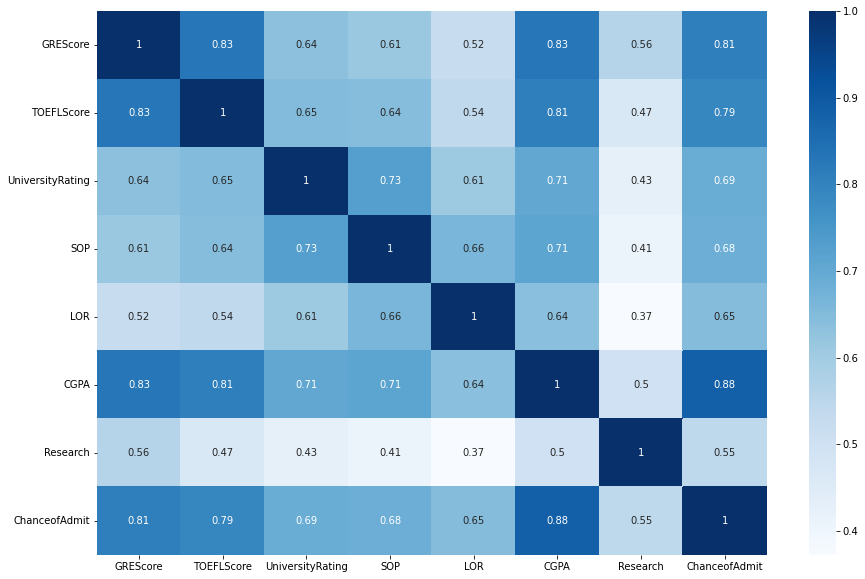

In [ ]:
#correlation matrix
corrmat= df.corr()
plt.figure(figsize=(15,10))  
sns.heatmap(corrmat,annot=True,cmap = "Blues",linewidth = 0)



---


**Split the Dataset into Train and Test Sets**


---



In [ ]:
# Assigning the features as X and target as y
X= df.drop(["ChanceofAdmit"],axis =1)
y= df["ChanceofAdmit"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)



---

**Determining Feature Importances**

---



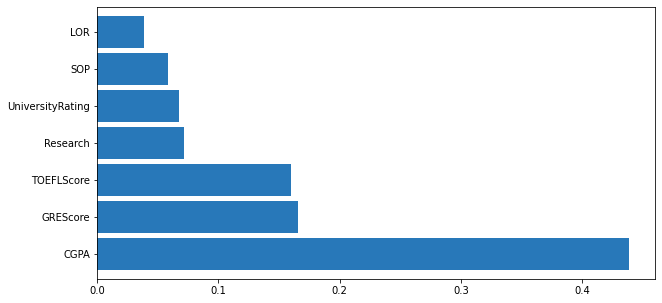

In [ ]:
model = ExtraTreesRegressor() 
model.fit(df.iloc[:,:-1],df.iloc[:,-1])
feat_impt = pd.Series(model.feature_importances_, index = df.iloc[:,:-1].columns) 
feat_impt.nlargest(7).plot(kind='barh', color='#2878b9', figsize=(10, 5), zorder=2, width=0.85)
plt.show()

Comment:

**CGPA**, **GREScore** and **TOEFLScore** has higher impact in getting Admission. **Research** and **University Rating** comes next. **SOP** and **LOR** has less impact.



---


**Developing & Comparing Machine Learning Models**

---



In [ ]:
#Building piplines for model selection

pipeline_lr=Pipeline([("scalar1",StandardScaler()),
                      ("LR",LinearRegression())])

pipeline_dt=Pipeline([("scalar2",StandardScaler()),
                      ("DT",DecisionTreeRegressor())])

pipeline_rf=Pipeline([("scalar3",StandardScaler()),
                      ("RF",RandomForestRegressor())])

pipeline_knn=Pipeline([("scalar4",StandardScaler()),
                       ("KN",KNeighborsRegressor())])

pipeline_xgb=Pipeline([("scalar5",StandardScaler()),
                       ("XGB",XGBRegressor(objective='reg:squarederror'))])

#List of all the pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_knn, pipeline_xgb]

# Dictionary of pipelines and model types
pipe_dict = {0: "LinearRegression", 1: "DecisionTree", 2: "RandomForest",3: "KNeighbors", 4: "XGBRegressor"}


# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

#Getting CV scores    
cv_results_rms = []
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train,y_train,scoring="neg_root_mean_squared_error", cv=10)
    cv_results_rms.append(cv_score)
    print("%s : %f" % (pipe_dict[i], abs(cv_score.mean())))



LinearRegression : 0.058744
DecisionTree : 0.089257
RandomForest : 0.063592
KNeighbors : 0.063844
XGBRegressor : 0.061776


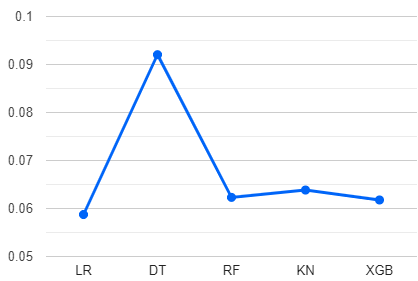

Comment:

**Linear Regression** has the **lowest RMSE** (0.058744), appropiate to use in this project.



---


**Model Evaluation**

---



In [ ]:
# Model prediction on test data
pred = pipeline_lr.predict(X_test)

# Model Evaluation
r2 = metrics.r2_score(y_test, pred)
Adjusted_r2 = 1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
mae = metrics.mean_absolute_error(y_test, pred)
mse = metrics.mean_squared_error(y_test, pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, pred))

# initialise data of lists.
ResultData = [[r2],[Adjusted_r2],[mae],[mse],[rmse]]
# Creates pandas DataFrame.
Results = pd.DataFrame(ResultData,columns= ["Scores"] ,index = ["R-Squared","Adjusted R-Squared", "Mean Absolute Error","Mean Square Error","Root Mean Square Error"])
Results.style.background_gradient(cmap="Blues")

,Scores
R-Squared,0.796213
Adjusted R-Squared,0.784020
Mean Absolute Error,0.045271
Mean Square Error,0.003989
Root Mean Square Error,0.063155




---


**Model Accuracy**

---



In [ ]:
model = LinearRegression(normalize=True)
model.fit(X_test, y_test)
model.score(X_test, y_test)

0.8136358383070955

That means our Linear Regression **Model Accuracy** is around **81.3%**

In [ ]:
final = LinearRegression(normalize=True)
final.fit(X_train,y_train)
final_pred = final.predict(X_test)

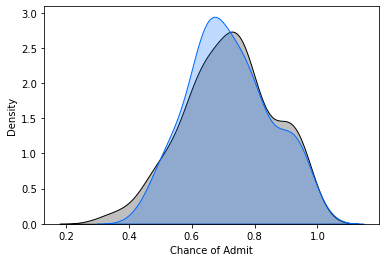

In [ ]:
sns.kdeplot(y_test, color = "#000000", shade=True) # Actual
sns.kdeplot(final_pred, color = "#0068ff", shade=True) # Predicted
plt.xlabel('Chance of Admit');



---


**Model Validation**

---



In [ ]:
X = df[['CGPA','GREScore','TOEFLScore', 'SOP', 'LOR', 'UniversityRating', 'Research']]
Y = df[['ChanceofAdmit']]

In [ ]:
reg = LinearRegression()

In [ ]:
reg.fit(X,Y)

LinearRegression()

In [ ]:
pred = reg.predict(X)

In [ ]:
user_input = [[3.5,340,120,5,5,5,1]] #user input from testing data 
#user_input = [[CGPA,GREScore,TOEFLScore,SOP,LOR,UniversityRating,Research]]

user_pred = reg.predict(user_input)
print(((user_pred.flatten()*100).astype(int)-2), "in percentages (%)") #output in %


[85] in percentages (%)




---


**Model Validation (First 5 factors)**

---



In [ ]:
X = df[['CGPA','GREScore','TOEFLScore', 'UniversityRating', 'Research']]
Y = df[['ChanceofAdmit']]

In [ ]:
reg = LinearRegression()

In [ ]:
reg.fit(X,Y)

LinearRegression()

In [ ]:
pred = reg.predict(X)

In [ ]:
user_input = [[4,340,120,1,1]] #user input from testing data 
#user_input = [[CGPA,GREScore,TOEFLScore, UniversityRating, Research]]

user_pred = reg.predict(user_input)
print(((user_pred.flatten()*100)-2).astype(int), "in percentages (%)") #output in %

[95] in percentages (%)




---


**Pickling the Model**

---



In [ ]:
import pickle

In [ ]:
pickle.dump(reg,open('gapml-pickle.pkl','wb'))


---
**END**

---

